In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Importing the training and validation set
df=pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [4]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


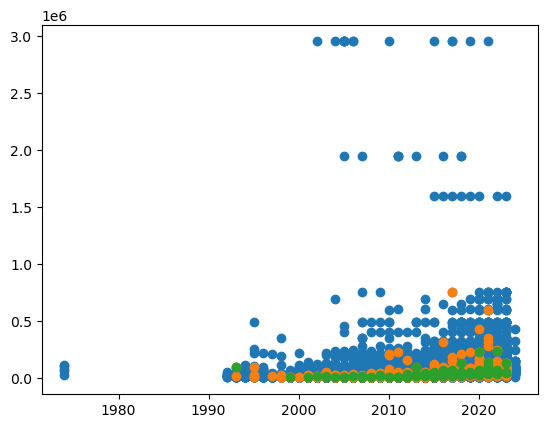

In [5]:
fig, ax=plt.subplots()
ax.scatter(df["model_year"],df["price"])
ax.scatter(df["model_year"][:1000], df["price"][:1000])
ax.scatter(df["model_year"][:100], df["price"][:100])

<Axes: ylabel='Frequency'>

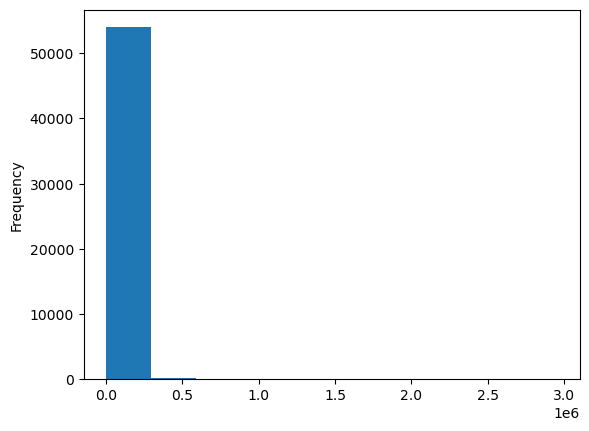

In [6]:
df.price.plot.hist()

### Parsing Dates
we will do this with the help of pandas and by using the phrase 'parse_dates' parameter

In [7]:
df.model_year[:100]

0     2018
1     2007
2     2009
3     2022
4     2001
      ... 
95    2016
96    2007
97    2016
98    2016
99    2003
Name: model_year, Length: 100, dtype: int64

In [8]:
df=pd.read_csv("train.csv", parse_dates=["model_year"])

In [9]:
df.model_year[:100]
# Note that the dtype of date has been changed to datetime64

0    2018-01-01
1    2007-01-01
2    2009-01-01
3    2022-01-01
4    2001-01-01
        ...    
95   2016-01-01
96   2007-01-01
97   2016-01-01
98   2016-01-01
99   2003-01-01
Name: model_year, Length: 100, dtype: datetime64[ns]

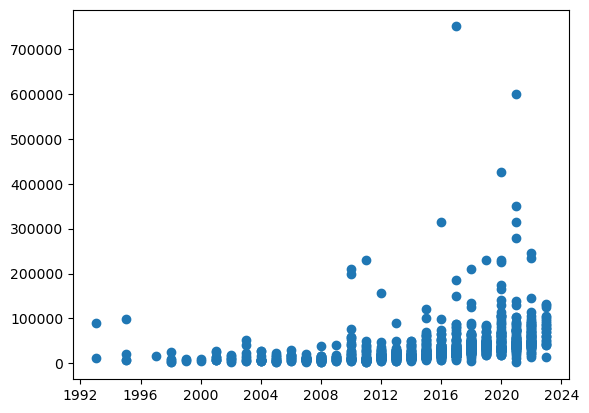

In [10]:
fig , ax =plt.subplots()
ax.scatter(df["model_year"][:1000],df["price"][:1000])

In [11]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018-01-01,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007-01-01,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009-01-01,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022-01-01,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001-01-01,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


### Sorting the dataframe according to model_year


In [12]:
df.sort_values(by=["model_year"], inplace=True, ascending=True)
df.model_year.head(10)

45996   1974-01-01
36106   1974-01-01
36639   1974-01-01
12252   1974-01-01
43113   1974-01-01
38062   1992-01-01
5992    1992-01-01
44551   1992-01-01
19204   1992-01-01
39544   1992-01-01
Name: model_year, dtype: datetime64[ns]

### Making a copy of original dataframe

In [13]:
df_temp=df.copy()
df_temp


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
45996,45996,Ford,Bronco,1974-01-01,6217,–,–,A/T,Dark Gray Metallic,–,None reported,Yes,73000
36106,36106,Ford,Bronco Outer Banks,1974-01-01,19590,–,–,A/T,Gray,Black,None reported,Yes,27500
36639,36639,Dodge,Challenger R/T Scat Pack,1974-01-01,6217,–,–,–,Green,Gray,None reported,Yes,55000
12252,12252,Bentley,Bronco,1974-01-01,6217,–,–,–,Dark Gray Metallic,–,None reported,Yes,115000
43113,43113,Ford,Bronco XLT,1974-01-01,18428,–,–,A/T,White,Black,None reported,Yes,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39000,39000,BMW,M3 CS,2024-01-01,124,Gasoline,453.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,80000
11685,11685,Maserati,Quattroporte S Q4 GranLusso,2024-01-01,7000,Gasoline,424.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Brown,None reported,Yes,145000
46775,46775,BMW,M3 CS,2024-01-01,13000,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Black,None reported,Yes,33700
31857,31857,BMW,M3 CS,2024-01-01,456,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Silver,Black,None reported,Yes,114000


In [14]:
# Adding datetime parameters for model_year

df_temp["modelyear"] =df_temp.model_year.dt.year
df_temp["salemonth"] =df_temp.model_year.dt.month
df_temp["saleday"] =df_temp.model_year.dt.day

In [15]:
# Drop original model_year
df_temp.drop("model_year" ,axis=1, inplace=True)

In [16]:
len(df_temp)

54273

### Building the model

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
model.fit(df_temp.drop("price", axis=1), df_temp["price"])

### throws ValueError: could not convert string to float: 'Ford'

In [17]:
df_temp.isna().sum()
# hence we have got no missing values..

id              0
brand           0
model           0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
modelyear       0
salemonth       0
saleday         0
dtype: int64

## our next step would be to convert all our data into numeric format....

In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 45996 to 45478
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
 12  modelyear     54273 non-null  int32 
 13  salemonth     54273 non-null  int32 
 14  saleday       54273 non-null  int32 
dtypes: int32(3), int64(3), object(9)
memory usage: 6.0+ MB


### coverting string to categories

In [19]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()
        ##as_ordered arranges them in alphabetical order

In [20]:
df_temp.info()
## hence string got converted into categories
##a numerical value is being assigned to each category 
## they look like strings but pandas is treating them as numbers

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 45996 to 45478
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            54273 non-null  int64   
 1   brand         54273 non-null  category
 2   model         54273 non-null  category
 3   milage        54273 non-null  int64   
 4   fuel_type     54273 non-null  category
 5   engine        54273 non-null  category
 6   transmission  54273 non-null  category
 7   ext_col       54273 non-null  category
 8   int_col       54273 non-null  category
 9   accident      54273 non-null  category
 10  clean_title   54273 non-null  category
 11  price         54273 non-null  int64   
 12  modelyear     54273 non-null  int32   
 13  salemonth     54273 non-null  int32   
 14  saleday       54273 non-null  int32   
dtypes: category(9), int32(3), int64(3)
memory usage: 3.0 MB


In [21]:
df_temp.fuel_type.cat.categories

Index(['Diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Plug-In Hybrid',
       'not supported', '–'],
      dtype='object')

In [22]:
df_temp.fuel_type.cat.codes

## the number that is being assigned to fuel_type which is now converted into categorical type

45996    6
36106    6
36639    6
12252    6
43113    6
        ..
39000    2
11685    2
46775    2
31857    2
45478    2
Length: 54273, dtype: int8

In [23]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 45996 to 45478
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            54273 non-null  int64   
 1   brand         54273 non-null  category
 2   model         54273 non-null  category
 3   milage        54273 non-null  int64   
 4   fuel_type     54273 non-null  category
 5   engine        54273 non-null  category
 6   transmission  54273 non-null  category
 7   ext_col       54273 non-null  category
 8   int_col       54273 non-null  category
 9   accident      54273 non-null  category
 10  clean_title   54273 non-null  category
 11  price         54273 non-null  int64   
 12  modelyear     54273 non-null  int32   
 13  salemonth     54273 non-null  int32   
 14  saleday       54273 non-null  int32   
dtypes: category(9), int32(3), int64(3)
memory usage: 3.0 MB


In [24]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

id
milage
price
modelyear
salemonth
saleday


### Turning categorical variables into numbers

In [25]:
### finding the columns which are not numeric
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

brand
model
fuel_type
engine
transmission
ext_col
int_col
accident
clean_title


In [26]:
pd.Categorical(df_temp["fuel_type"]).codes

array([6, 6, 6, ..., 2, 2, 2], dtype=int8)

In [27]:
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label] = pd.Categorical(content).codes + 1 

In [28]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 45996 to 45478
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            54273 non-null  int64
 1   brand         54273 non-null  int8 
 2   model         54273 non-null  int16
 3   milage        54273 non-null  int64
 4   fuel_type     54273 non-null  int8 
 5   engine        54273 non-null  int16
 6   transmission  54273 non-null  int8 
 7   ext_col       54273 non-null  int16
 8   int_col       54273 non-null  int8 
 9   accident      54273 non-null  int8 
 10  clean_title   54273 non-null  int8 
 11  price         54273 non-null  int64
 12  modelyear     54273 non-null  int32
 13  salemonth     54273 non-null  int32
 14  saleday       54273 non-null  int32
dtypes: int16(3), int32(3), int64(3), int8(6)
memory usage: 2.9 MB


In [29]:
%%time
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
model.fit(df_temp.drop("price", axis=1), df_temp["price"])


CPU times: total: 48.5 s
Wall time: 8.99 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [30]:
#Score
model.score(df_temp.drop("price", axis=1), df_temp["price"])
#maximum value=1

#NOTE--Evaluation is done on the same data on which we had trained..so the result loses it svalididty

0.8672987035602115

In [31]:
df_temp["modelyear"]

45996    1974
36106    1974
36639    1974
12252    1974
43113    1974
         ... 
39000    2024
11685    2024
46775    2024
31857    2024
45478    2024
Name: modelyear, Length: 54273, dtype: int32

### saving the processed data
df_temp.to_csv("t.csv", index=False)


### importing pre-processed data
df_temp = pd.read_csv("t.csv")
df_temp.head()

In [32]:
### Split data into training and validation set
df_val =df_temp[df_temp.modelyear ==2023]
df_train = df_temp[df_temp.modelyear != 2023]

len(df_val), len(df_train)

(1794, 52479)

In [33]:
# Split data into x and y
x_train,y_train = df_train.drop("price", axis=1), df_train.price
x_valid,y_valid = df_val.drop("price", axis=1) , df_val.price

x_train.shape ,y_train.shape, x_valid.shape, y_valid.shape

((52479, 14), (52479,), (1794, 14), (1794,))

### Building an evaluation function

In [34]:
# Create evaluation function(RMSLE)
from sklearn.metrics import mean_squared_error

def rmsle(y_test , y_preds):
    """
    calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_error(y_test,y_preds))

# Create function to evaluate moel on a few diff levels
def show_scores(model):
    train_preds =model.predict(x_train)
    val_preds =model.predict(x_valid)
    scores = {
              "Training RMSE":rmsle(y_train,train_preds),
              "Valid RMSE": rmsle(y_valid,val_preds)
              
              
            
             
             }
    return scores




In [35]:
# Changing Max samples in RandomForestRegressor
model =RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                            max_samples=20000)


In [36]:
model.fit(x_train,y_train)

RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=42)

In [37]:
show_scores(model)

{'Training RMSE': 47454.71192525269, 'Valid RMSE': 89173.34786147681}

 ### Hyperparameter tuning with RandomizedSearchCV

In [38]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(50, 200, 10),
           
    "max_features": [ 'sqrt', 'log2', None],
    "max_depth": [None] + list(np.arange(10, 110, 10)),
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "bootstrap": [True, False],
          "max_samples" : [20000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             
                             param_distributions=rf_grid,
                             n_iter=200,
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\DELL\car\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
505 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
505 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\car\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\car\env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\car\env\Lib\site-packages\sklearn\ensemble\_forest.py", line 433, in fit
    raise ValueError(
ValueEr

CPU times: total: 1h 38min 10s
Wall time: 15min 55s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=200,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   verbose=True)

In [39]:
# Finding the best model hyperparameters
rs_model.best_params_

{'n_estimators': 190,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_samples': 20000,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': True}

In [40]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training RMSE': 65940.59800426374, 'Valid RMSE': 85312.54338364855}

## training the model with selected hyperparameters


In [54]:
%%time

# ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators=190,
                                    min_samples_split=14,
                                    min_samples_leaf=15,
                                    max_features='log2',
                                    max_depth=20,
                                    bootstrap=True,
                                    random_state=42)
                                    
                                

 

 
 
 
 
#Fit the ideal model
ideal_model.fit(x_train,y_train)

CPU times: total: 9.38 s
Wall time: 9.95 s


RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=15,
                      min_samples_split=14, n_estimators=190, random_state=42)

In [55]:
show_scores(ideal_model)

{'Training RMSE': 64243.7798501351, 'Valid RMSE': 85256.5943977442}

In [43]:
show_scores(rs_model)

{'Training RMSE': 65940.59800426374, 'Valid RMSE': 85312.54338364855}

## Making predictions on test data

In [44]:
## Import test data
df_test=pd.read_csv("test.csv",
                   parse_dates=["model_year"])

df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014-01-01,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015-01-01,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015-01-01,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018-01-01,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020-01-01,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


## Preprocessing the test data

In [45]:
# Adding datetime parameters for model_year

df_test["modelyear"] =df_test.model_year.dt.year
df_test["salemonth"] =df_test.model_year.dt.month
df_test["saleday"] =df_test.model_year.dt.day

In [46]:
# Drop original model_year
df_test.drop("model_year" ,axis=1, inplace=True)

In [47]:
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()
        ##as_ordered arranges them in alphabetical order

In [48]:
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label] = pd.Categorical(content).codes + 1 

In [49]:
df_test.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,modelyear,salemonth,saleday
0,54273,35,529,73000,3,545,34,221,9,2,1,2014,1,1
1,54274,27,1247,128032,3,411,27,188,11,2,1,2015,1,1
2,54275,35,318,51983,3,312,21,27,108,2,1,2015,1,1
3,54276,26,1319,29500,3,912,43,221,108,1,1,2018,1,1
4,54277,5,1711,90000,3,634,27,221,11,1,1,2020,1,1


In [50]:
# making predictions on the test dataset
test_preds=ideal_model.predict(df_test)
test_preds

array([24028.26951122, 22617.25123634, 30209.94062209, ...,
       11846.23002676, 58075.41045744, 18479.34469067])

In [51]:
df_preds =pd.DataFrame()
df_preds["id"] = df_test["id"]
df_preds["price"] = test_preds
df_preds

,id,price
0,54273,24028.269511
1,54274,22617.251236
2,54275,30209.940622
3,54276,57789.111333
4,54277,38437.429712
...,...,...
36178,90451,73247.490081
36179,90452,15443.499744
36180,90453,11846.230027
36181,90454,58075.410457


In [57]:
df_preds.to_csv("test_predictions3.csv", index=False)